# 에어팟 리뷰를 긍부정 분류 에 따른 각각 시각화 진행하기

In [16]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from matplotlib import font_manager, rc

In [3]:
airpods = pd.read_excel('(2)apple_all_airpods.xlsx')
airpods

,ratings,reviews,label
0,5,비싸서 고민되면 사는게 맞다. 1. 배송속도 / 2. 제조년월 / 3. 포장 품질 ...,1
1,4,배송은 엉망이지만 사용 후기는 아주 만족 와.. 대박 방금 받았는데...엄청 안전하...,1
2,5,한번도 안 써본 사람은 있어도 한번만 쓴 사람은 없다. 아이폰6s에서 8로 바꿨더니...,1
3,4,진심 이건 신세계다!!!!!!!!@_@ 그동안 쿠팡에서 로켓배송을 시켜도 한번도 박...,1
4,5,애플의 감성을 담은 블루투스 이어폰 무선 블루투스 이어폰의 새강자 '에어팟'그렇다....,1
...,...,...,...
7255,5,등록된 헤드라인이 없습니다 등록된 리뷰내용이 없습니다,1
7256,5,등록된 헤드라인이 없습니다 등록된 리뷰내용이 없습니다,1
7257,5,등록된 헤드라인이 없습니다 등록된 리뷰내용이 없습니다,1
7258,5,등록된 헤드라인이 없습니다 등록된 리뷰내용이 없습니다,1


In [6]:
posipods = airpods[airpods['label'] == 1]
negepods = airpods[airpods['label'] == 0]

,ratings,reviews,label
33,2,포장 상태 별로입니다. 귓구멍 작은 분들은 비추 로켓 배송으로 다음날 바로 받아서 ...,0
69,1,등록된 헤드라인이 없습니다 무엇보다 로켓배송으로 빠른배송 너무 좋아요!!!! 줄이없...,0
95,2,등록된 헤드라인이 없습니다 애플 에어팟 구매후기 입니다!지극히 제 개인적인 의견 및...,0
107,1,it is only for Apple 하두 사람들이 평을 좋게 내리길래 아이콘 x ...,0
161,1,등록된 헤드라인이 없습니다 소비자 입장에선 이런거 되게 불쾌합니다..교환한번했는데 ...,0
...,...,...,...
6522,1,서비스센터 방문 초기불량 다시 받는데 5일걸리네요연결안되서 방문했어요,0
6523,1,등록된 헤드라인이 없습니다 불량 중고제품이 도착했습니다. 그리고 그들은 환불을 하지...,0
6524,1,등록된 헤드라인이 없습니다 그래도 가전제품인데 포장이 너무 허술하네요 포장에 좀 신...,0
6525,1,등록된 헤드라인이 없습니다 15일결제18일 수령뭔놈에 로켓배송이 이따구여그리고 안에...,0


In [12]:
PosiSum = posipods['reviews'].str.cat()
NegeSum = negepods['reviews'].str.cat()

clean_PosiReview = re.sub(r'[^가-힣 ]', '', PosiSum)
clean_NegeReview = re.sub(r'[^가-힣 ]', '', NegeSum)

In [19]:
nlp = Okt()
review_positive = nlp.nouns(clean_PosiReview)
review_negetive = nlp.nouns(clean_NegeReview)

removeWords = ['등록', '헤드라인', '리뷰', '용이', '제품', '에어팟']

review_positive = [word for word in review_positive if word not in removeWords]
review_negetive = [word for word in review_negetive if word not in removeWords]

In [20]:
countP = Counter(review_positive)
countN = Counter(review_negetive)

In [21]:
word_countP = dict()
for tag, counts in countP.most_common(60):
    if(len(str(tag)) > 1):
        word_countP[tag] = counts

word_countN = dict()
for tag, counts in countN.most_common(60):
    if(len(str(tag)) > 1):
        word_countN[tag] = counts

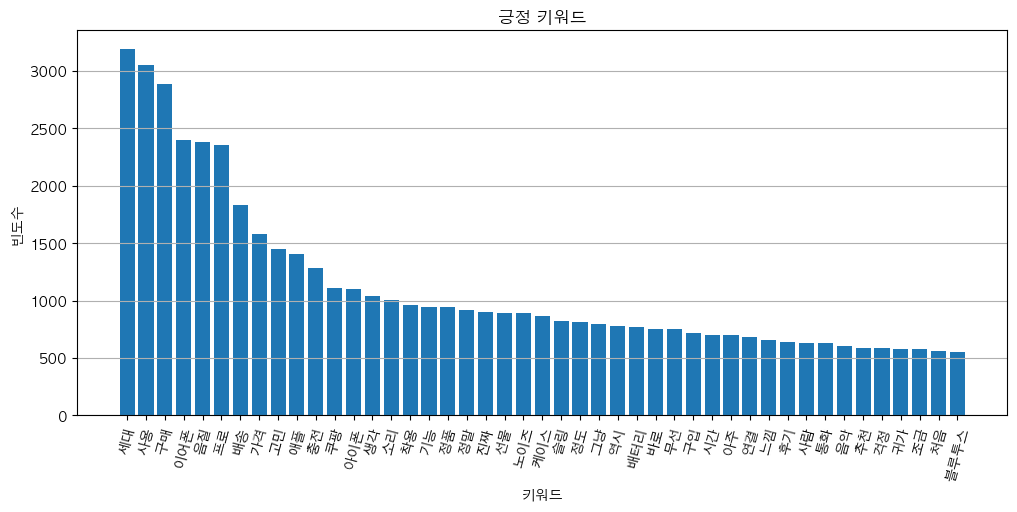

In [36]:
font_path = rc('font', family='AppleGothic')

plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('긍정 키워드')
plt.grid(True, axis='y')
sorted_Keys = sorted(word_countP, key = word_countP.get, reverse = True)
sorted_Values = sorted(word_countP.values(), reverse = True)
plt.bar(range(len(word_countP)), sorted_Values, align = 'center')    # 센터는 디폴트라 생략가능
plt.xticks(range(len(word_countP)), list(sorted_Keys), rotation = 75)
plt.show()

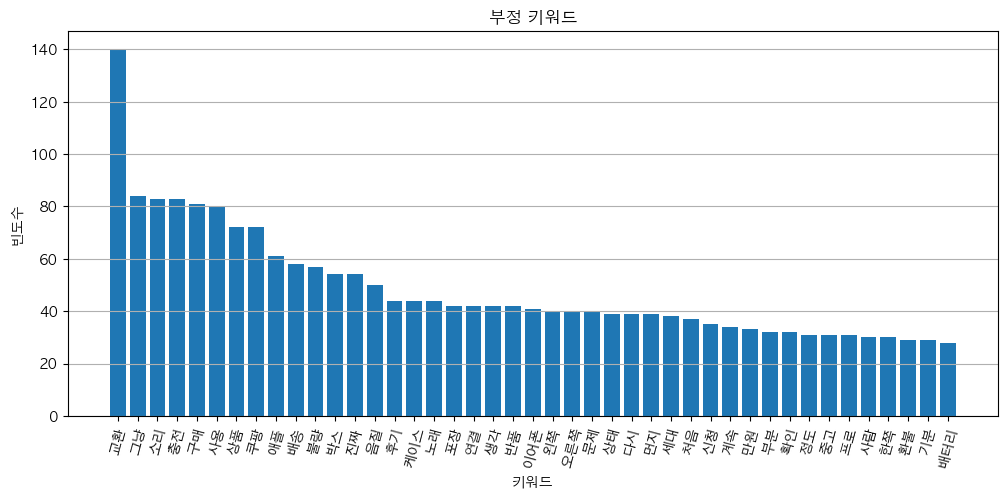

In [37]:
plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('부정 키워드')
plt.grid(True, axis='y')
sorted_Keys = sorted(word_countN, key = word_countN.get, reverse = True)
sorted_Values = sorted(word_countN.values(), reverse = True)
plt.bar(range(len(word_countN)), sorted_Values, align = 'center')    # 센터는 디폴트라 생략가능
plt.xticks(range(len(word_countN)), list(sorted_Keys), rotation = 75)
plt.show()